# 🧮 Étude : Figures Géométriques — Aires et Visualisations

|     |                     |
| --- | ------------------- |
| Nom | Maimouna Diallo |
| 🆔  | 300155187          |

Ce notebook démontre l’utilisation d’une hiérarchie de classes Python :

- `Figure` (classe de base)
- `Carre`
- `Cercle`

Puis l'affichage graphique grâce à :

- **matplotlib 3.9.2**
- **numpy 2.1.3**

Nous allons :
1. définir les classes dans le notebook  
2. créer un carré et un cercle  
3. tracer les figures graphiquement  

In [155]:
from carre import Carre
from cercle import Cercle
from losange import losange
from parallelogramme import parallelogramme
from cylindre import cylindre
from prisme_carre import prisme_carre
from prisme_losange import prisme_losange
from prisme_parallelogramme import prisme_parallelogramme
from sphere import sphere
from cone import cone


c1 = Carre(4)
c2 = Cercle(3)
c3 = losange(10,8)
c4 = parallelogramme(12,7)
c5 = cylindre(10,5)
c6 = prisme_carre(8,4)
c7 = prisme_losange(12,6,2)
c8 = prisme_parallelogramme(14,8,9)
c9 = sphere(1.33)
c10 = cone(0.33, 2)








In [156]:
import numpy as np
import matplotlib.pyplot as plt

In [157]:
def afficher_carre(carre):
    cote = carre.cote
    x = [0, cote, cote, 0, 0]
    y = [0, 0, cote, cote, 0]

    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.fill(x, y, alpha=0.3)
    plt.title(f"Carré — côté={cote}, aire={carre.aire()}")
    plt.axis("equal")
    plt.grid(True)
    plt.show()

In [158]:
def afficher_cercle(cercle):
    r = cercle.rayon
    theta = np.linspace(0, 2*np.pi, 300)

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.fill(x, y, alpha=0.3)
    plt.title(f"Cercle — rayon={r}, aire={cercle.aire():.2f}")
    plt.axis("equal")
    plt.grid(True)
    plt.show()

In [159]:
import matplotlib.pyplot as plt
import numpy as np

def afficher_losange(losange):
    d1 = losange.d1
    d2 = losange.d2

    # Coordonnées des sommets du losange (constructeur basé sur diagonales)
    x = [0,  d1/2,   0,   -d1/2, 0]
    y = [d2/2, 0,  -d2/2, 0,  d2/2]

    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.fill(x, y, alpha=0.3)
    plt.title("Losange — d1={d1}, d2={d2}, aire={losange.aire():.2f}")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


In [160]:
import matplotlib.pyplot as plt
import numpy as np

def afficher_parallelogramme(par):
    b = par.b
    h = par.h
    
    # Décalage horizontal du sommet supérieur (pour l'inclinaison)
    d = b / 3  # Par exemple: par.decalage = 2

    # Coordonnées des 4 sommets
    x = [0, b, b + d, d, 0]
    y = [0, 0, h, h, 0]

    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.fill(x, y, alpha=0.3)
    plt.title(f"Parallélogramme — base={b}, hauteur={h}, aire={par.aire():.2f}")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


In [161]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def afficher_cylindre(cylindre):
    r = cylindre.rayon
    h = cylindre.hauteur

    # Grille d'angles et de hauteurs
    theta = np.linspace(0, 2 * np.pi, 50)
    z = np.linspace(0, h, 50)
    theta, z = np.meshgrid(theta, z)

    # Coordonnées en 3D du cylindre
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Figure 3D
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    # Surface latérale
    ax.plot_surface(x, y, z, alpha=0.5)

    # Base inférieure
    ax.plot_surface(r * np.cos(theta), r * np.sin(theta), 
                    np.zeros_like(theta), alpha=0.7)

    # Base supérieure
    ax.plot_surface(r * np.cos(theta), r * np.sin(theta), 
                    h * np.ones_like(theta), alpha=0.7)

    # Titre
    ax.set_title(f"Cylindre — rayon={r}, hauteur={h}, volume={cylindre.volume():.2f}")

    # Proportion égale des axes
    ax.set_box_aspect([1, 1, 1])

    plt.show()


In [162]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def afficher_prisme_carre(p):
    c = p.cote
    h = p.hauteur

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = [0, c, c, 0, 0]
    y = [0, 0, c, c, 0]
    z_bottom = [0,0,0,0,0]
    z_top    = [h,h,h,h,h]

    ax.plot3D(x, y, z_bottom)
    ax.plot3D(x, y, z_top)

    for i in range(4):
        ax.plot3D([x[i], x[i]], [y[i], y[i]], [0, h])

    ax.set_title(f"Prisme carré — côté={c}, hauteur={h}, volume={p.volume():.2f}")
    plt.show()


In [163]:
def afficher_prisme_losange(p):
   d1, d2, h = p.d1, p.d2, p.hauteur

   x = [0, d1/2, 0, -d1/2, 0]
   y = [d2/2, 0, -d2/2, 0, d2/2]

   fig = plt.figure()
   ax = fig.add_subplot(111, projection='3d')

   ax.plot3D(x, y, [0]*5)
   ax.plot3D(x, y, [h]*5)

   for i in range(4):
        ax.plot3D([x[i], x[i]], [y[i], y[i]], [0, h])

   ax.set_title(f"Prisme losange — volume={p.volume():.2f}")
   plt.show()

In [164]:
def afficher_prisme_parallelogramme(p):
    b = p.base
    h = p.hauteur_parallelo
    prof = p.profondeur
    d = b / 3

    x = [0, b, b+d, d, 0]
    y = [0, 0, h, h, 0]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot3D(x, y, [0]*5)
    ax.plot3D(x, y, [prof]*5)

    for i in range(4):
        ax.plot3D([x[i], x[i]], [y[i], y[i]], [0, prof])

    ax.set_title(f"Prisme Parallélogramme — volume={p.volume():.2f}")
    plt.show()

In [165]:
def afficher_sphere(s):
     r = s.rayon

     theta, phi = np.linspace(0, np.pi, 40), np.linspace(0, 2*np.pi, 40)
     theta, phi = np.meshgrid(theta, phi)

     x = r * np.sin(theta) * np.cos(phi)
     y = r * np.sin(theta) * np.sin(phi)
     z = r * np.cos(theta)

     fig = plt.figure()
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(x, y, z, alpha=0.3)

     ax.set_title(f"Sphère — rayon={r}, volume={s.volume():.2f}")
     plt.show()


In [166]:
def afficher_cone(c):
     r = c.rayon
     h = c.hauteur

     theta = np.linspace(0, 2*np.pi, 50)
     z = np.linspace(0, h, 50)
     theta, z = np.meshgrid(theta, z)

     x = (r * (1 - z/h)) * np.cos(theta)
     y = (r * (1 - z/h)) * np.sin(theta)

     fig = plt.figure()
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(x, y, z, alpha=0.3)

     ax.set_title(f"Cône — rayon={r}, hauteur={h}, volume={c.volume():.2f}")
     plt.show()

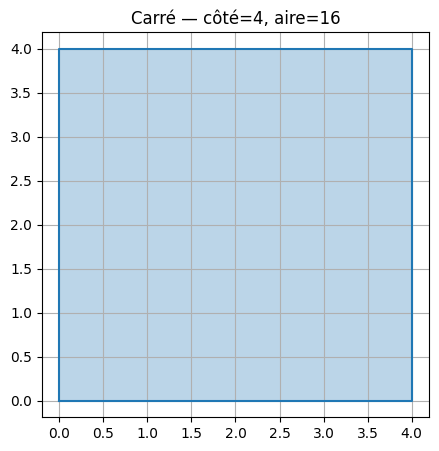

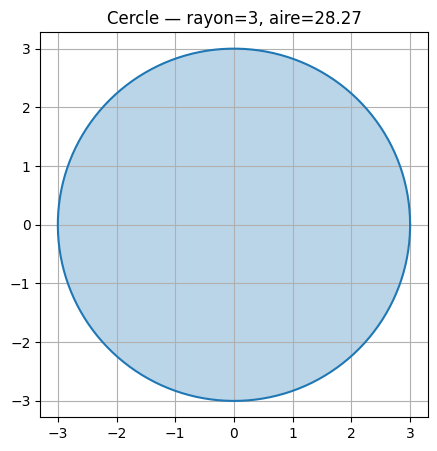

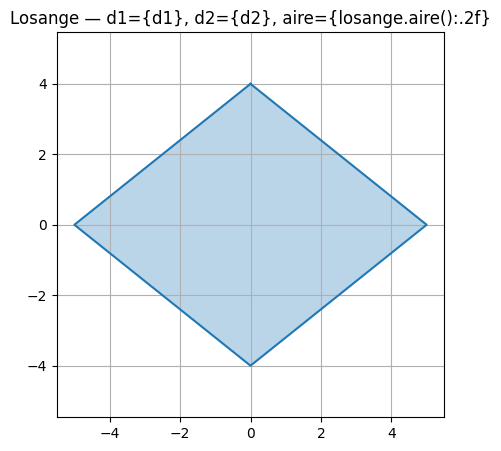

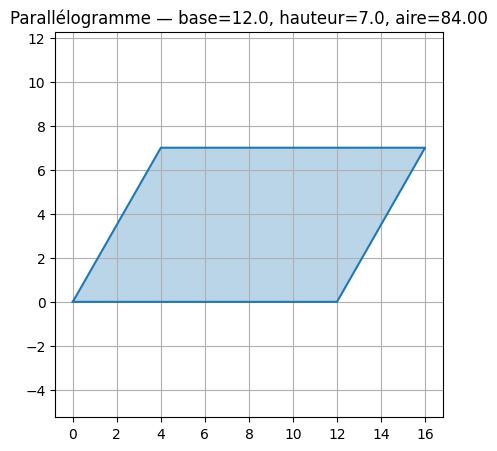

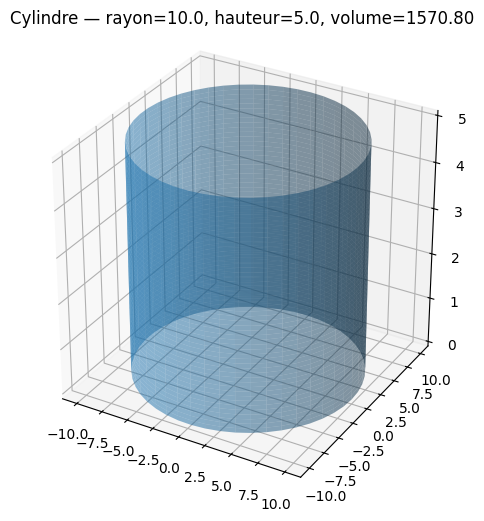

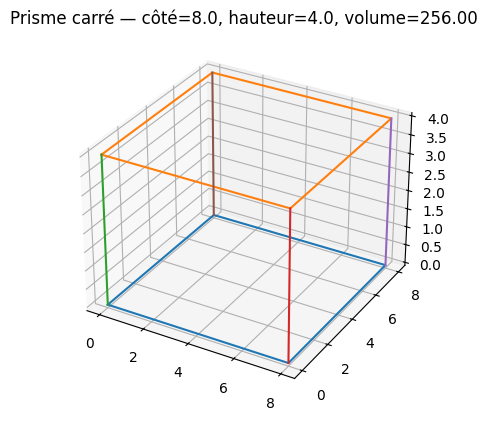

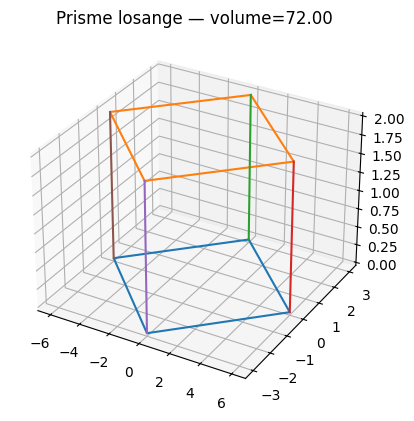

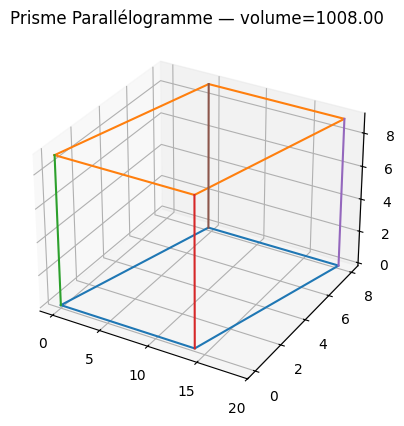

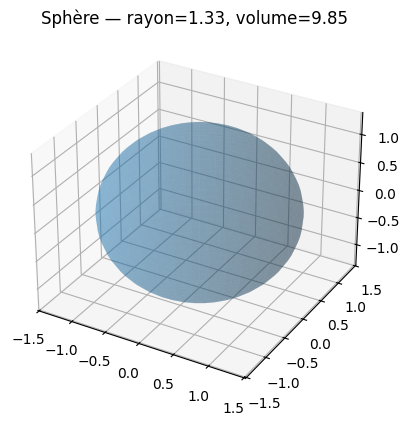

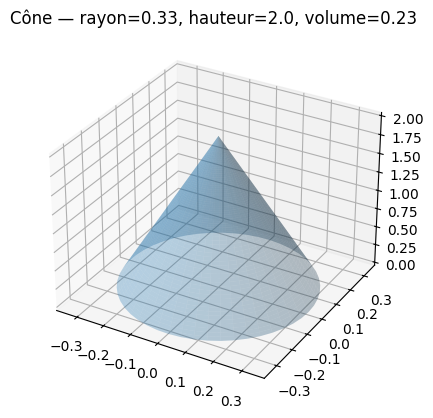

In [167]:
afficher_carre(c1)
afficher_cercle(c2)
afficher_losange(c3)
afficher_parallelogramme(c4)
afficher_cylindre(c5)
afficher_prisme_carre(c6)
afficher_prisme_losange(c7)
afficher_prisme_parallelogramme(c8)
afficher_sphere(c9)
afficher_cone(c10)